In [146]:
import pandas as pd
import numpy as np

In [147]:
pivot_data4 = pd.read_csv('/Users/emilkoch/Desktop/2Tango/messenger/Research/Weeks/Week_14/pivot_data4.csv')

Number of clusters: 1, WCSS: 1041972.0000007446
Number of clusters: 2, WCSS: 857386.5847300735
Number of clusters: 3, WCSS: 751123.6473178607
Number of clusters: 4, WCSS: 659282.7080355815
Number of clusters: 5, WCSS: 575146.6050043418
Number of clusters: 6, WCSS: 493105.5296016998
Number of clusters: 7, WCSS: 437383.76971968287
Number of clusters: 8, WCSS: 404343.82742491656
Number of clusters: 9, WCSS: 378110.5549230031
Number of clusters: 10, WCSS: 347198.8808746446


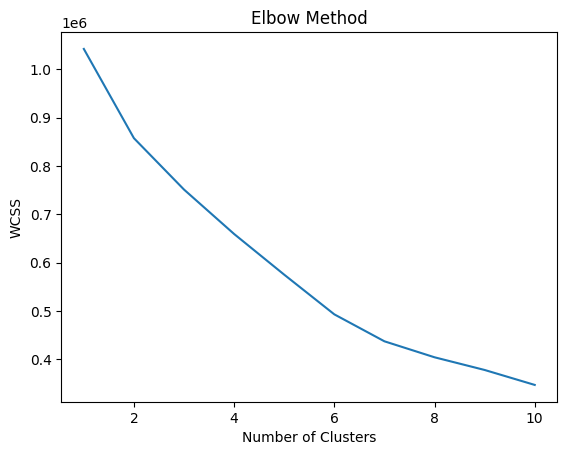

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sensor_data_scaled)
    wcss.append(kmeans.inertia_)
    print(f"Number of clusters: {i}, WCSS: {kmeans.inertia_}")

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Elbow method tells us that the optimal number of clusters = 5. 

In [149]:
pivot_data4 = pd.read_csv('/Users/emilkoch/Desktop/2Tango/messenger/Research/Weeks/Week_14/pivot_data4.csv')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant sensor data
sensor_data = pivot_data4[['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']]

# Standardize the data
scaler = StandardScaler()
sensor_data_scaled = scaler.fit_transform(sensor_data)

# Initialize KMeans with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit KMeans to your scaled sensor data
cluster_labels = kmeans.fit_predict(sensor_data_scaled)

# Convert standardized sensor data and cluster labels to a DataFrame
sensor_data_with_labels = pd.DataFrame(sensor_data_scaled, columns=sensor_data.columns)
sensor_data_with_labels['cluster_label'] = cluster_labels
sensor_data = sensor_data_with_labels  # Use the DataFrame with cluster labels


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [151]:
sensor_data['timestamp'] = pivot_data4['timestamp']

In [152]:
# Initialize a new column for duration
sensor_data['duration'] = 0

# Initialize variables to store previous cluster label and its timestamp
prev_cluster_label = None
earliest_timestamp = None

# Iterate through each row in the DataFrame
for index, row in sensor_data.iterrows():
    # Check if the cluster label changes compared to the previous row
    if row['cluster_label'] != prev_cluster_label:
        # If yes, calculate the duration
        if earliest_timestamp is not None:
            duration = abs(row['timestamp'] - earliest_timestamp)  # Calculate the duration (ensure positive)
            # Update the duration for the previous row
            sensor_data.at[index - 1, 'duration'] = duration
        # Update the previous cluster label and its timestamp
        prev_cluster_label = row['cluster_label']
        earliest_timestamp = row['timestamp']

# For the last segment, calculate the duration
if earliest_timestamp is not None:
    last_index = sensor_data.index[-1]
    duration = abs(sensor_data.at[last_index, 'timestamp'] - earliest_timestamp)
    sensor_data.at[last_index, 'duration'] = duration

In [153]:
# Calculate the mean duration
mean_duration = sensor_data['duration'].mean()

# Define function to map duration values to descriptions
def map_duration(duration):
    if duration > mean_duration:
        return 'long'
    elif duration < mean_duration:
        return 'short'
    else:
        return 'moderate'

# Apply the function row-wise to create the new column 'duration_name'
sensor_data['duration_name'] = sensor_data['duration'].apply(map_duration)

In [161]:
mean_accel_x = sensor_data['accel_x'].mean()
mean_accel_y = sensor_data['accel_y'].mean()
mean_accel_z = sensor_data['accel_z'].mean()

mean_accel_x = sensor_data['gyro_x'].mean()
mean_accel_x = sensor_data['gyro_y'].mean()
mean_accel_x = sensor_data['gyro_z'].mean()

# Define function to map duration values to descriptions
def map_accel(accel_x):
    if accel_x > mean_accel_x:
        return 'high'
    elif accel_x < mean_accel_x:
        return 'low'
    else:
        return 'medium'

# Apply the function row-wise to create the new column 'duration_name'
sensor_data['accel_x_name'] = sensor_data['accel_x'].apply(map_accel)

In [164]:
# Define function to map duration values to descriptions
def map_accely(accel_y):
    if accel_y > mean_accel_y:
        return 'high'
    elif accel_y < mean_accel_y:
        return 'low'
    else:
        return 'medium'

# Apply the function row-wise to create the new column 'duration_name'
sensor_data['accel_y_name'] = sensor_data['accel_y'].apply(map_accely)

In [165]:
# Define function to map duration values to descriptions
def map_accelz(accel_z):
    if accel_z > mean_accel_z:
        return 'high'
    elif accel_z < mean_accel_z:
        return 'low'
    else:
        return 'medium'

# Apply the function row-wise to create the new column 'duration_name'
sensor_data['accel_z_name'] = sensor_data['accel_z'].apply(map_accelz)

In [166]:
sensor_data

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,cluster_label,duration,timestamp,duration_name,accel_x_name,accel_y_name,accel_z_name
0,0.112622,0.164773,-0.047704,0.008060,-0.000313,-0.003003,0,1,465,long,high,high,low
1,-0.123533,0.675206,8.227909,0.008060,-0.000313,-0.003003,4,0,466,short,low,high,high
2,0.112622,0.164773,-0.047704,0.008060,-0.000313,-0.003003,0,0,466,short,high,high,low
3,0.112622,0.164773,-0.047704,0.008060,-0.000313,-0.003003,0,0,466,short,high,high,low
4,0.112622,0.164773,-0.047704,0.030278,-0.081585,0.026196,0,0,466,short,high,high,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173657,0.112622,0.164773,-0.047704,0.008060,-0.000313,-0.003003,0,0,1221,short,high,high,low
173658,0.112622,0.164773,-0.047704,0.008060,-0.000313,-0.003003,0,0,1221,short,high,high,low
173659,0.112622,0.164773,-0.047704,0.008060,-0.000313,-0.003003,0,0,1221,short,high,high,low
173660,0.112622,0.164773,-0.047704,0.008060,-0.000313,-0.003003,0,0,1221,short,high,high,low


In [99]:
# Initialize an empty list to store the text data
text_data = []

# Iterate over the rows of sensor_data
for index, row in sensor_data.iterrows():
    # Extract the cluster label
    cluster_label = row['cluster_label']
    
    # Initialize empty lists to store gyro and accel sensor values
    gyro_values = []
    accel_values = []
    
    # Iterate over the columns of sensor_data to extract gyro and accel values
    for col in ['gyro_x', 'gyro_y', 'gyro_z']:
        # Extract the gyro sensor value and convert it to a string
        gyro_value_str = f"{col}: {row[col]:.3f}"
        
        # Append the gyro sensor value string to the list
        gyro_values.append(gyro_value_str)
    
    # Combine the gyro values into a string
    gyro_values_str = ", ".join(gyro_values)
    
    # Iterate over the columns of sensor_data to extract accel values
    for col in ['accel_x', 'accel_y', 'accel_z']:
        # Extract the accel sensor value and convert it to a string
        accel_value_str = f"{col}: {row[col]:.3f}"
        
        # Append the accel sensor value string to the list
        accel_values.append(accel_value_str)
    
    # Combine the accel values into a string
    accel_values_str = ", ".join(accel_values)
    
    # Extract the duration value for the current row
    duration_value = row['duration']
    
    # Convert the duration value to a string
    duration_value_str = f"duration: {duration_value:.3f}"
    
    # Create the text for the current row
    text = f"[CLS] gyroscope: {gyro_values_str}; accelerometer: {accel_values_str}; {duration_value_str}; [SEP]"
    
    # Append the text and cluster label to the list
    text_data.append({"labels": f"{cluster_label}", "text": text})

# Convert the list of dictionaries to a DataFrame
text_df = pd.DataFrame(text_data)

In [101]:
text_df_pathway = '/Users/emilkoch/Desktop/2Tango/messenger/Research/Weeks/Week_14/text_df.csv'

text_df.to_csv(text_df_pathway, index = False)

In [102]:
subset = text_df.head(100)

In [109]:
subset

,labels,text
0,0.0,"[CLS] gyroscope: gyro_x: 0.008, gyro_y: -0.000..."
1,4.0,"[CLS] gyroscope: gyro_x: 0.008, gyro_y: -0.000..."
2,0.0,"[CLS] gyroscope: gyro_x: 0.008, gyro_y: -0.000..."
3,0.0,"[CLS] gyroscope: gyro_x: 0.008, gyro_y: -0.000..."
4,0.0,"[CLS] gyroscope: gyro_x: 0.030, gyro_y: -0.082..."
...,...,...
95,0.0,"[CLS] gyroscope: gyro_x: 0.008, gyro_y: -0.000..."
96,0.0,"[CLS] gyroscope: gyro_x: 0.008, gyro_y: -0.000..."
97,0.0,"[CLS] gyroscope: gyro_x: 0.008, gyro_y: -0.000..."
98,0.0,"[CLS] gyroscope: gyro_x: 0.008, gyro_y: -0.000..."


In [104]:
subset_pathway = '/Users/emilkoch/Desktop/2Tango/messenger/Research/Weeks/Week_14/subset.csv'

subset.to_csv(subset_pathway, index = False)

In [108]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertForMaskedLM, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

# Tokenize and encode the training examples
tokenized_datasets = TextDataset(
    tokenizer=tokenizer,
    file_path="/Users/emilkoch/Desktop/2Tango/messenger/Research/Weeks/Week_14/subset.csv",  # Path to the saved text file
    block_size=128,  # Specify the maximum sequence length
)

# Define data collator for language modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/Users/emilkoch/Desktop/2Tango/Data Files/Dataset_2_glasses/finetuned_bert",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
    logging_dir="/Users/emilkoch/Desktop/2Tango/Data Files/Dataset_2_glasses/logs",
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets,
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained("/Users/emilkoch/Desktop/2Tango/Data Files/Dataset_2_glasses/finetuned_bert")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/27 [00:00<?, ?it/s]

{'train_runtime': 345.2643, 'train_samples_per_second': 0.6, 'train_steps_per_second': 0.078, 'train_loss': 0.5775577757093642, 'epoch': 3.0}


In [143]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForMaskedLM

# Load the fine-tuned BERT model
model = BertForMaskedLM.from_pretrained("/Users/emilkoch/Desktop/2Tango/Data Files/Dataset_2_glasses/finetuned_bert")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load your formatted data
subset_test = text_df.head(1)

# Extract sensor data from the subset_test DataFrame
sensor_data = subset_test['text'].iloc[0]

# Tokenize input sensor data
tokenized_sensor_data = tokenizer(sensor_data, return_tensors="pt")

# Construct the prompt
prompt = f"Given the sensor data: {sensor_data}, the motion type can likely be described with the following two words: [MASK]."
prompt_input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"]

# Generate prediction
with torch.no_grad():
    output = model.generate(input_ids=prompt_input_ids, max_length=128, num_return_sequences=1)

# Decode generated text and extract predicted motion description
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
predicted_motion_description = generated_text.split("the motion type can likely be described as ")[-1]

print("Predicted Motion Description:", predicted_motion_description)




Predicted Motion Description: given the sensor data : gyroscope : gyro _ x : 0. 008, gyro _ y : - 0. 000, gyro _ z : - 0. 003 ; accelerometer : accel _ x : 0. 113, accel _ y : 0. 165, accel _ z : - 0. 048 ; duration : 1. 000 ;, the motion type can likely be described with the following two words :. 0. 0. 0. 0. 0. 0. 0. 0. 0 0. 0. 0 0.


In [141]:
subset_test['predicted_motion_type'].unique()

array(['0'], dtype=object)